<a href="https://colab.research.google.com/github/saloabdala/Examen1/blob/main/consumer_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerías pandas, numpy y matplotlib respecitvamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [3]:
#Carga desde un archivo .csv sin indice
data=pd.read_excel("consumer_mit_lift_lab.xlsx")
data.head(5)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,...,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee,240_gender_interviewee,indicate_the_type_of_store,name_of_the_store,storefront_picture_just_once_if_possible
0,060a856c-e3b8-41a7-b680-9756172d1c29,"November 12, 2022",2022-11-12 22:43:08 UTC,Ulises Núñez Bautista,SRID=4326;POINT(-98.2349802856 19.0598413203),19.059841,-98.234980,Efectivo,no,agua de coco,...,1,0,0,0,0,35,Male,Cafeteria,Paleteria El Carmen,NaN
1,c42fdf22-b93b-443e-8f46-6043613cb0c3,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2335660729 19.05847939),19.058479,-98.233566,Efectivo,yes,NaN,...,1,2,0,35,50,27,Female,Grocery store (aka. nanostore),Gerardo Saénz,NaN
2,3ccaedc0-949e-4555-afad-b2e1d77c3219,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2303385023 19.0620767997),19.062077,-98.230339,Efectivo,yes,NaN,...,0,0,0,40,25,42,Female,Micro-restaurant (aka. fondita),Rozt,1 Photo
3,91d8a240-af2c-451b-900f-3480f82e05db,"November 12, 2022",2022-11-12 20:41:38 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329163449 19.0555346049),19.055535,-98.232916,Tarjeta de débito y/o crédito,yes,NaN,...,2,3,0,0,0,27,Female,Cafeteria,Café Colibrí,1 Photo
4,3efefc56-bd45-4e4a-bf02-ab725e9fb41a,"November 12, 2022",2022-11-12 19:49:13 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329944224 19.0590117522),19.059012,-98.232994,Efectivo,yes,NaN,...,2,5,0,0,50,35,Female,Cafeteria,La fête,1 Photo


In [4]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                    0
_title                                        0
_server_updated_at                            0
_updated_by                                   0
_geometry                                     0
_latitude                                     0
_longitude                                    0
282_payment_method_that_purchase              0
283_fulfill_needs                             0
300_did_not_find                            109
237_distance_household_interviewee            0
299_means_transportation_consumer             0
238_frequency_buying_store                    0
284_additional_products_store               111
301_electricity_bill                          0
305_electricity_bill_store                    7
302_water_bill                                0
306_water_bill_store                          4
303_gas_bill                                  0
307_gas_bill_store                            3
286_topups                              

In [5]:
#Sustitución de los valores nulos
#Sustituimos los datos nulos por el anterior a cada uno, siendo estos así porque son generales y no sobrepasan el 10% de los datos
data["305_electricity_bill_store"]=data["305_electricity_bill_store"].fillna(method="bfill")
data["306_water_bill_store"]=data["306_water_bill_store"].fillna(method="bfill")
data["307_gas_bill_store"]=data["307_gas_bill_store"].fillna(method="bfill")
data["308_topups_in_store"]=data["308_topups_in_store"].fillna(method="bfill")
data["309_wiretransfers_in_store"]=data["309_wiretransfers_in_store"].fillna(method="bfill")
#Sustituimos los datos nulos por un enunciado, siendo estos así porque son casos muy específicos para llenarlos por otros datos
data["storefront_picture_just_once_if_possible"]=data["storefront_picture_just_once_if_possible"].fillna("Imagen no proporcionada")
data["300_did_not_find"]=data["300_did_not_find"].fillna("Dato no proporcionado")
data["284_additional_products_store"]=data["284_additional_products_store"].fillna("Dato no proporcionado")
data["304_additional_services_store"]=data["304_additional_services_store"].fillna("Dato no proporcionado")

In [6]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                                  0
_title                                      0
_server_updated_at                          0
_updated_by                                 0
_geometry                                   0
_latitude                                   0
_longitude                                  0
282_payment_method_that_purchase            0
283_fulfill_needs                           0
300_did_not_find                            0
237_distance_household_interviewee          0
299_means_transportation_consumer           0
238_frequency_buying_store                  0
284_additional_products_store               0
301_electricity_bill                        0
305_electricity_bill_store                  0
302_water_bill                              0
306_water_bill_store                        0
303_gas_bill                                0
307_gas_bill_store                          0
286_topups                                  0
308_topups_in_store               

<Figure size 1080x576 with 0 Axes>

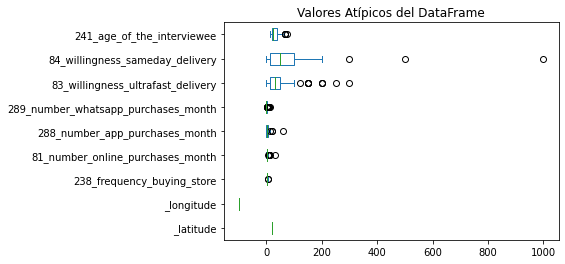

In [7]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,8))
data.plot(kind="box",vert=False)
plt.title ("Valores Atípicos del DataFrame")
plt.show() #dibujamos el diagrama

In [8]:
#Método aplicando desviación estándar.Encuentro los valores extremos
y=data
Limite_Superior=y.mean()+3*y.std()
Limite_Inferior=y.mean()-3*y.std()
print("Límite superior permitido",Limite_Superior)
print("Límite inferior permitido",Limite_Inferior)

Límite superior permitido _latitude                               19.110143
_longitude                             -98.092103
238_frequency_buying_store               6.315174
81_number_online_purchases_month        13.640687
288_number_app_purchases_month          23.607792
289_number_whatsapp_purchases_month      8.188708
83_willingness_ultrafast_delivery      208.723621
84_willingness_sameday_delivery        404.146007
241_age_of_the_interviewee              72.249359
dtype: float64
Límite inferior permitido _latitude                               18.985154
_longitude                             -98.351215
238_frequency_buying_store              -2.280392
81_number_online_purchases_month        -8.405904
288_number_app_purchases_month         -16.477357
289_number_whatsapp_purchases_month     -5.927839
83_willingness_ultrafast_delivery     -112.114925
84_willingness_sameday_delivery       -262.041659
241_age_of_the_interviewee             -12.075446
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [9]:
#Encontramos Outliers del DataFrame
outliers=data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,...,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee,240_gender_interviewee,indicate_the_type_of_store,name_of_the_store,storefront_picture_just_once_if_possible
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data2=data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,...,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee,240_gender_interviewee,indicate_the_type_of_store,name_of_the_store,storefront_picture_just_once_if_possible
0,NaN,NaN,NaN,NaN,NaN,19.059841,-98.234980,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,35.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,19.058479,-98.233566,NaN,NaN,NaN,...,1.0,2.0,0.0,35.0,50.0,27.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,19.062077,-98.230339,NaN,NaN,NaN,...,0.0,0.0,0.0,40.0,25.0,42.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,19.055535,-98.232916,NaN,NaN,NaN,...,2.0,3.0,0.0,0.0,0.0,27.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,19.059012,-98.232994,NaN,NaN,NaN,...,2.0,5.0,0.0,0.0,50.0,35.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,NaN,NaN,NaN,NaN,NaN,19.035224,-98.267100,NaN,NaN,NaN,...,NaN,10.0,0.0,100.0,100.0,15.0,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,19.035280,-98.267856,NaN,NaN,NaN,...,1.0,1.0,0.0,50.0,70.0,21.0,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,19.035451,-98.267862,NaN,NaN,NaN,...,3.0,2.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,19.035486,-98.267831,NaN,NaN,NaN,...,2.0,4.0,0.0,30.0,100.0,18.0,NaN,NaN,NaN,NaN


In [11]:
#Eliminamos columnas innecesarias
data3=data2.drop(['_record_id','_title', '_server_updated_at', '_updated_by','_geometry', '282_payment_method_that_purchase', '283_fulfill_needs', '300_did_not_find', '237_distance_household_interviewee', '299_means_transportation_consumer', '284_additional_products_store', '301_electricity_bill', '305_electricity_bill_store', '302_water_bill', '306_water_bill_store', '303_gas_bill', '307_gas_bill_store', '286_topups', '308_topups_in_store', '287_wire_transfers', '320_other_services_in_store', "309_wiretransfers_in_store", '304_additional_services_store', '240_gender_interviewee', 'indicate_the_type_of_store', 'name_of_the_store', 'storefront_picture_just_once_if_possible' ], axis=1)
data3

,_latitude,_longitude,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,19.059841,-98.234980,1.0,1.0,0.0,0.0,0.0,0.0,35.0
1,19.058479,-98.233566,1.0,1.0,2.0,0.0,35.0,50.0,27.0
2,19.062077,-98.230339,1.0,0.0,0.0,0.0,40.0,25.0,42.0
3,19.055535,-98.232916,1.0,2.0,3.0,0.0,0.0,0.0,27.0
4,19.059012,-98.232994,1.0,2.0,5.0,0.0,0.0,50.0,35.0
...,...,...,...,...,...,...,...,...,...
110,19.035224,-98.267100,1.0,NaN,10.0,0.0,100.0,100.0,15.0
111,19.035280,-98.267856,1.0,1.0,1.0,0.0,50.0,70.0,21.0
112,19.035451,-98.267862,1.0,3.0,2.0,0.0,0.0,0.0,18.0
113,19.035486,-98.267831,1.0,2.0,4.0,0.0,30.0,100.0,18.0


In [12]:
#Identificar valores nulos por columna
valores_nulos=data3.isnull().sum()
valores_nulos

_latitude                              0
_longitude                             0
238_frequency_buying_store             2
81_number_online_purchases_month       2
288_number_app_purchases_month         1
289_number_whatsapp_purchases_month    1
83_willingness_ultrafast_delivery      2
84_willingness_sameday_delivery        2
241_age_of_the_interviewee             1
dtype: int64

In [13]:
#Reemplazamos valores nulos del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,_latitude,_longitude,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,19.059841,-98.234980,1.0,1.0,0.0,0.0,0.0,0.0,35.0
1,19.058479,-98.233566,1.0,1.0,2.0,0.0,35.0,50.0,27.0
2,19.062077,-98.230339,1.0,0.0,0.0,0.0,40.0,25.0,42.0
3,19.055535,-98.232916,1.0,2.0,3.0,0.0,0.0,0.0,27.0
4,19.059012,-98.232994,1.0,2.0,5.0,0.0,0.0,50.0,35.0
...,...,...,...,...,...,...,...,...,...
110,19.035224,-98.267100,1.0,2.3,10.0,0.0,100.0,100.0,15.0
111,19.035280,-98.267856,1.0,1.0,1.0,0.0,50.0,70.0,21.0
112,19.035451,-98.267862,1.0,3.0,2.0,0.0,0.0,0.0,18.0
113,19.035486,-98.267831,1.0,2.0,4.0,0.0,30.0,100.0,18.0


In [14]:
#Identificar valores nulos por columna
valores_nulos=data_clean.isnull().sum()
valores_nulos

_latitude                              0
_longitude                             0
238_frequency_buying_store             0
81_number_online_purchases_month       0
288_number_app_purchases_month         0
289_number_whatsapp_purchases_month    0
83_willingness_ultrafast_delivery      0
84_willingness_sameday_delivery        0
241_age_of_the_interviewee             0
dtype: int64

In [15]:
#Unimos las columnas con el data frame
columnas_quitadas=data[['_record_id','_title', '_server_updated_at', '_updated_by','_geometry', '282_payment_method_that_purchase', '283_fulfill_needs', '300_did_not_find', '237_distance_household_interviewee', '299_means_transportation_consumer', '284_additional_products_store', '301_electricity_bill', '305_electricity_bill_store', '302_water_bill', '306_water_bill_store', '303_gas_bill', '307_gas_bill_store', '286_topups', '308_topups_in_store', '287_wire_transfers', '320_other_services_in_store', "309_wiretransfers_in_store", '304_additional_services_store', '240_gender_interviewee', 'indicate_the_type_of_store', 'name_of_the_store', 'storefront_picture_just_once_if_possible']]
Datos_limpios=pd.concat([columnas_quitadas, data_clean], axis=1)
Datos_limpios

,_record_id,_title,_server_updated_at,_updated_by,_geometry,282_payment_method_that_purchase,283_fulfill_needs,300_did_not_find,237_distance_household_interviewee,299_means_transportation_consumer,...,storefront_picture_just_once_if_possible,_latitude,_longitude,238_frequency_buying_store,81_number_online_purchases_month,288_number_app_purchases_month,289_number_whatsapp_purchases_month,83_willingness_ultrafast_delivery,84_willingness_sameday_delivery,241_age_of_the_interviewee
0,060a856c-e3b8-41a7-b680-9756172d1c29,"November 12, 2022",2022-11-12 22:43:08 UTC,Ulises Núñez Bautista,SRID=4326;POINT(-98.2349802856 19.0598413203),Efectivo,no,agua de coco,0 a 3 cuadras,A pie,...,Imagen no proporcionada,19.059841,-98.234980,1.0,1.0,0.0,0.0,0.0,0.0,35.0
1,c42fdf22-b93b-443e-8f46-6043613cb0c3,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2335660729 19.05847939),Efectivo,yes,Dato no proporcionado,7 a 10 cuadras,A pie,...,Imagen no proporcionada,19.058479,-98.233566,1.0,1.0,2.0,0.0,35.0,50.0,27.0
2,3ccaedc0-949e-4555-afad-b2e1d77c3219,"November 12, 2022",2022-11-12 22:15:02 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2303385023 19.0620767997),Efectivo,yes,Dato no proporcionado,más de 10 cuadras,Automóvil,...,1 Photo,19.062077,-98.230339,1.0,0.0,0.0,0.0,40.0,25.0,42.0
3,91d8a240-af2c-451b-900f-3480f82e05db,"November 12, 2022",2022-11-12 20:41:38 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329163449 19.0555346049),Tarjeta de débito y/o crédito,yes,Dato no proporcionado,4 a 6 cuadras,Motocicleta,...,1 Photo,19.055535,-98.232916,1.0,2.0,3.0,0.0,0.0,0.0,27.0
4,3efefc56-bd45-4e4a-bf02-ab725e9fb41a,"November 12, 2022",2022-11-12 19:49:13 UTC,Jorge Alberto Ostorga Flores,SRID=4326;POINT(-98.2329944224 19.0590117522),Efectivo,yes,Dato no proporcionado,más de 10 cuadras,Transporte público,...,1 Photo,19.059012,-98.232994,1.0,2.0,5.0,0.0,0.0,50.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,ee7ac407-4767-47b1-93b3-d7e09b49faec,"November 3, 2022",2022-11-03 20:15:32 UTC,Daniel Serrano,SRID=4326;POINT(-98.2671002671 19.0352236761),Efectivo,yes,Dato no proporcionado,20 min,Automóvil,...,1 Photo,19.035224,-98.267100,1.0,2.3,10.0,0.0,100.0,100.0,15.0
111,f65a8190-df80-440e-83bc-2639decfffd0,"November 3, 2022",2022-11-03 20:05:31 UTC,Daniel Serrano,SRID=4326;POINT(-98.2678556442 19.0352804088),Efectivo,yes,Dato no proporcionado,30 min,Transporte público,...,1 Photo,19.035280,-98.267856,1.0,1.0,1.0,0.0,50.0,70.0,21.0
112,70f42238-83b5-4a16-9f2e-a758efb8afb0,"November 3, 2022",2022-11-03 20:04:35 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678617 19.0354511),Efectivo,yes,Dato no proporcionado,0 a 3 cuadras,A pie,...,1 Photo,19.035451,-98.267862,1.0,3.0,2.0,0.0,0.0,0.0,18.0
113,e4727f46-797f-4344-b183-0deeed11750f,"November 3, 2022",2022-11-03 20:04:34 UTC,Fernando Gonzálezinactivo,SRID=4326;POINT(-98.2678314 19.0354858),Efectivo,yes,Dato no proporcionado,más de 10 cuadras,Didi,...,1 Photo,19.035486,-98.267831,1.0,2.0,4.0,0.0,30.0,100.0,18.0


In [16]:
#Convertit DataFrame a CSV
Datos_limpios.to_csv("Datos_limpios_consumer.csv")

In [66]:
#Descargar archivo filtrado en csv
files.download("Datos_limpios_consumer.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>